In [3]:
import torch
torch.cuda.is_available()
device = "cuda" if torch.cuda.is_available() else "cpu"
# use mac gpu if available
device = "mps" if torch.backends.mps.is_available() else "cpu"
print(device)
torch.set_default_device(device)
print(torch.__version__)
print(torch.get_default_dtype())

mps
2.5.1
torch.float32


In [4]:
import torch
x = torch.tensor([1.0, 2.0, 3.0]).to(device)
y = torch.tensor([4.0, 5.0, 6.0]).to(device)
print(x + y)
print(x * y)
print(torch.sin(x))
print(torch.cos(x))
x = torch.rand(5, 3)
y = torch.rand(5, 3)
print(x + y)
print(torch.matmul(x, y.T))
x

tensor([5., 7., 9.], device='mps:0')
tensor([ 4., 10., 18.], device='mps:0')
tensor([0.8415, 0.9093, 0.1411], device='mps:0')
tensor([ 0.5403, -0.4161, -0.9900], device='mps:0')
tensor([[0.8622, 1.7663, 0.8163],
        [1.7800, 0.7018, 0.9101],
        [0.2903, 0.7355, 1.5624],
        [0.8532, 1.2975, 1.6265],
        [0.9900, 1.2734, 1.0745]], device='mps:0')
tensor([[1.1298, 1.0974, 0.4305, 1.0384, 1.3650],
        [0.6485, 1.0638, 0.4826, 0.7018, 0.9593],
        [1.0032, 0.8668, 0.6872, 1.0827, 1.4985],
        [1.1331, 1.2140, 0.8068, 1.2303, 1.6998],
        [0.5886, 0.7615, 0.1753, 0.5091, 0.6499]], device='mps:0')


tensor([[0.4651, 0.8494, 0.3929],
        [0.8534, 0.1138, 0.4849],
        [0.1351, 0.6369, 0.8635],
        [0.5053, 0.5731, 0.9614],
        [0.5542, 0.3669, 0.0760]], device='mps:0')

In [5]:
tensor_int = torch.tensor([5,3,2.5]).type(torch.int8)
tensor_float = torch.tensor([5.0,3.0,2]).type(torch.half)
print(tensor_int.type())
print(tensor_float.type())
print(tensor_int)
print(tensor_float)

torch.mps.CharTensor
torch.mps.HalfTensor
tensor([5, 3, 2], device='mps:0', dtype=torch.int8)
tensor([5., 3., 2.], device='mps:0', dtype=torch.float16)


In [6]:
tensor_full = torch.full((2,6,4), fill_value=10)
tensor_full

tensor([[[10, 10, 10, 10],
         [10, 10, 10, 10],
         [10, 10, 10, 10],
         [10, 10, 10, 10],
         [10, 10, 10, 10],
         [10, 10, 10, 10]],

        [[10, 10, 10, 10],
         [10, 10, 10, 10],
         [10, 10, 10, 10],
         [10, 10, 10, 10],
         [10, 10, 10, 10],
         [10, 10, 10, 10]]], device='mps:0')

In [7]:
tensor_eye = torch.eye(10)
tensor_zeros = torch.zeros(5, 3)
tensor_ones = torch.ones_like(tensor_zeros)
print(tensor_eye)
print(tensor_zeros)
print(tensor_ones)

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], device='mps:0')
tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]], device='mps:0')
tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], device='mps:0')


In [8]:
torch.nonzero(tensor_eye)

tensor([[0, 0],
        [1, 1],
        [2, 2],
        [3, 3],
        [4, 4],
        [5, 5],
        [6, 6],
        [7, 7],
        [8, 8],
        [9, 9]], device='mps:0')

In [9]:
torch.set_default_device('cpu')
i = torch.tensor([[0,1,1],
                  [2,3,4]])
v = torch.tensor([1,2,3], dtype=torch.float16)
sparse_tensor = torch.sparse_coo_tensor(i, v, [5, 5])
print(sparse_tensor)
print(sparse_tensor.to_dense())

tensor(indices=tensor([[0, 1, 1],
                       [2, 3, 4]]),
       values=tensor([1., 2., 3.]),
       size=(5, 5), nnz=3, dtype=torch.float16, layout=torch.sparse_coo)
tensor([[0., 0., 1., 0., 0.],
        [0., 0., 0., 2., 3.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]], dtype=torch.float16)


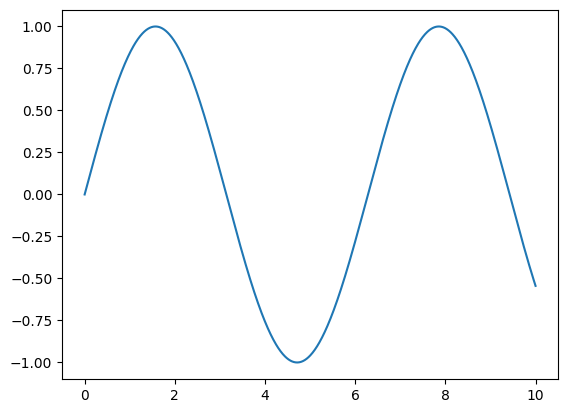

In [10]:
import matplotlib.pyplot as plt
x = torch.linspace(0.0, 10.0, 1000)
y = torch.sin(x)
plt.plot(x.numpy(), y.numpy())
plt.show()

In [11]:
i = torch.linspace(0,1,steps=15)
i = torch.chunk(i, 3)
i

(tensor([0.0000, 0.0714, 0.1429, 0.2143, 0.2857]),
 tensor([0.3571, 0.4286, 0.5000, 0.5714, 0.6429]),
 tensor([0.7143, 0.7857, 0.8571, 0.9286, 1.0000]))

In [12]:
i_1 = i[0]
i_2 = i[1]
i_3 = torch.tensor([5,6,7])

torch.cat((i_1,i_2,i_3), dim=0)

tensor([0.0000, 0.0714, 0.1429, 0.2143, 0.2857, 0.3571, 0.4286, 0.5000, 0.5714,
        0.6429, 5.0000, 6.0000, 7.0000])

In [13]:
t = torch.tensor([
    [10,8,30],
    [40,5,6],
    [12,2,21],
])
print(t)
print(t.t())
print(t[0,1])
print(t[1:,1:])
print(t.size())
t2 = torch.cat([t.view(9),torch.tensor([10000,2,3])], dim=0)
print(t2)
print(t2.view(3,4))
s1, s_indices = torch.sort(t2.view(3,4))
print(s1)
print(s_indices)


tensor([[10,  8, 30],
        [40,  5,  6],
        [12,  2, 21]])
tensor([[10, 40, 12],
        [ 8,  5,  2],
        [30,  6, 21]])
tensor(8)
tensor([[ 5,  6],
        [ 2, 21]])
torch.Size([3, 3])
tensor([   10,     8,    30,    40,     5,     6,    12,     2,    21, 10000,
            2,     3])
tensor([[   10,     8,    30,    40],
        [    5,     6,    12,     2],
        [   21, 10000,     2,     3]])
tensor([[    8,    10,    30,    40],
        [    2,     5,     6,    12],
        [    2,     3,    21, 10000]])
tensor([[1, 0, 2, 3],
        [3, 0, 1, 2],
        [2, 3, 0, 1]])


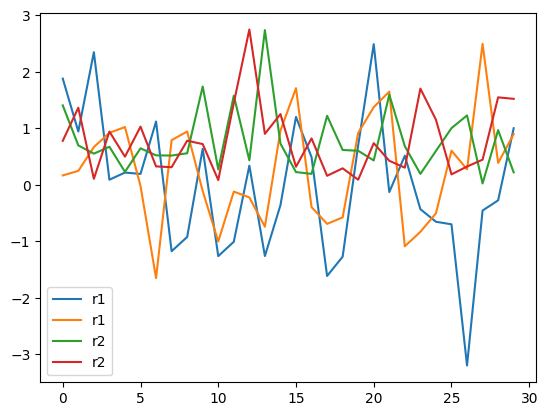

In [39]:
r1 = torch.randn(30,2)
r2 = torch.abs(torch.randn(30,2))
# clear the plt before plotting
#plt.clf()
plt.plot(r1.numpy(), label='r1')
plt.plot(r2.numpy(), label='r2')
plt.legend()
plt.show()

In [15]:
r1 = torch.abs(torch.randn(2,3))
r2 = torch.abs(torch.randn(2,3))
a1 = r1 + r2
print(a1)

tensor([[3.0713, 2.3237, 1.9409],
        [2.5768, 1.6824, 1.3601]])


In [16]:
import numpy as np
t1 = torch.rand(4,3)
print(t1)
print(type(t1))
n1 = t1.numpy()
print(n1)
print(type(n1))
n1[0][1] = 100
print(n1)
print(t1)

tensor([[0.6282, 0.4746, 0.0325],
        [0.6607, 0.4463, 0.7837],
        [0.2234, 0.0125, 1.0000],
        [0.2466, 0.2738, 0.8198]])
<class 'torch.Tensor'>
[[0.6281882  0.47455418 0.03248954]
 [0.66067666 0.44630486 0.7836851 ]
 [0.22340178 0.01253062 0.9999961 ]
 [0.24658108 0.2738033  0.8198295 ]]
<class 'numpy.ndarray'>
[[6.2818819e-01 1.0000000e+02 3.2489538e-02]
 [6.6067666e-01 4.4630486e-01 7.8368509e-01]
 [2.2340178e-01 1.2530625e-02 9.9999613e-01]
 [2.4658108e-01 2.7380329e-01 8.1982952e-01]]
tensor([[6.2819e-01, 1.0000e+02, 3.2490e-02],
        [6.6068e-01, 4.4630e-01, 7.8369e-01],
        [2.2340e-01, 1.2531e-02, 1.0000e+00],
        [2.4658e-01, 2.7380e-01, 8.1983e-01]])


In [21]:
n1 = np.random.randint(1, 10, size=(4,3))
t1 = torch.from_numpy(n1).to(device)
print(t1)
n1[0][1] = 100
print(n1)
print(t1)

tensor([[3, 1, 9],
        [5, 8, 3],
        [4, 8, 2],
        [2, 4, 5]], device='mps:0')
[[  3 100   9]
 [  5   8   3]
 [  4   8   2]
 [  2   4   5]]
tensor([[3, 1, 9],
        [5, 8, 3],
        [4, 8, 2],
        [2, 4, 5]], device='mps:0')


In [43]:
print(f'{torch.mps.device_count()=}')
print(f'{torch.mps.current_allocated_memory()=}')

torch.mps.device_count()=1
torch.mps.current_allocated_memory()=2816
